# Logistic Regression

### TODO
1. Multidimensional
2. Add comments 
3. SGD Log-reg https://medium.com/aiguys/logistic-regression-in-machine-learning-from-scratch-62f45048c571

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

Generowanie danych

In [2]:
size = 30
st1 = int(0.33 * size)
st2 = int(0.33 * size)
st3 = size - st1 - st2

data_X = np.sort(np.random.uniform(-1, 1, size=size))
data_Y = np.array([0 for x in range(int(0.5 * size))] + [1 for x in range(size - int(0.5 * size))])
# data_Y = np.array([0 for _ in range(st1)] + [0 if x < 0 else 1 for x in np.random.randn(st2)] + [1 for _ in range(st3)])

df = pd.DataFrame({'data': data_X,
                   'label': data_Y})
display(df)

X = df[['data']].values
Y = df[['label']].values

,data,label
0,-0.969249,0
1,-0.851197,0
2,-0.845896,0
3,-0.836767,0
4,-0.830015,0
5,-0.732484,0
6,-0.682180,0
7,-0.655493,0
8,-0.484115,0
9,-0.443575,0


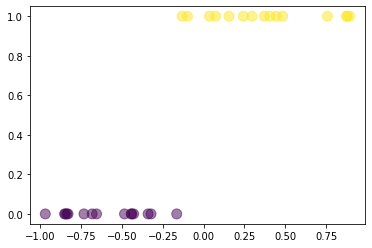

In [3]:
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.show()

Szukamy funkcji:
$$
\LARGE{p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}},
$$

która najlepiej opisze nasze dane.

In [4]:
beta_0 = -1.
beta_1 = 6.

beta = np.array([[beta_0], [beta_1]])
display(beta)

x = np.concatenate([np.ones((100, 1)), np.linspace(-1, 1, 100).reshape(-1, 1)], axis=1)

y = x.dot(beta)

p = 1 / (1 + np.exp(- y))

array([[-1.],
       [ 6.]])

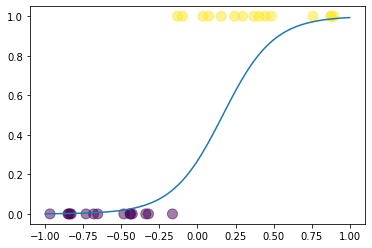

In [5]:
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.plot(x[:, 1], p)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none', max_iter=10_000)
model.fit(data_X.reshape(-1, 1), data_Y)

LogisticRegression(max_iter=10000, penalty='none')

In [8]:
model.coef_[0, 0]

534.3065267557984

In [9]:
model.intercept_[0]

79.21212438521727

beta_0: 79.21212438521727
beta_1: 534.3065267557984


/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_27932/3338504058.py:18: RuntimeWarning: divide by zero encountered in divide
  log_ods = np.log(data_Y/(1 - data_Y))
/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_27932/3338504058.py:18: RuntimeWarning: divide by zero encountered in log
  log_ods = np.log(data_Y/(1 - data_Y))
/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_27932/3338504058.py:22: RuntimeWarning: divide by zero encountered in divide
  log_ods_p = np.log(p/(1-p))


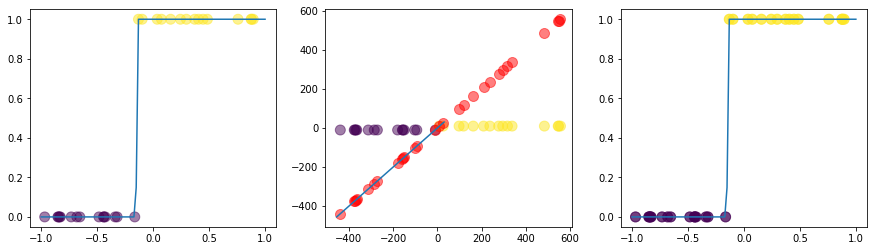

Lilelihood: 0.9997108330519767
Log-lilelihood: -0.00028920876484677294



In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

beta_0 = model.intercept_[0]
beta_1 = model.coef_[0, 0]

print(f"beta_0: {beta_0}")
print(f"beta_1: {beta_1}")

x = np.linspace(-1, 1, 100)
y = beta_0 + beta_1 * x
p = 1 / (1 + np.exp(- y))


ax1.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
ax1.plot(x, p)


log_ods = np.log(data_Y/(1 - data_Y))
log_ods_vis = [-10 if x==-np.inf else 10 for x in log_ods]
X_log_ods = beta_0 + beta_1 * data_X

log_ods_p = np.log(p/(1-p))
x_log_ods_p = beta_0 + beta_1 * x

y_projectcion = beta_0 + beta_1 * data_X

ax2.plot(x_log_ods_p, log_ods_p)
ax2.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
ax2.scatter(X_log_ods, y_projectcion, s=100, alpha=0.5, c='red')

prob_y = 1 / (1 + np.exp(-y_projectcion))

ax3.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
ax3.scatter(data_X, prob_y, s=100, alpha=0.5, c=data_Y)
ax3.plot(x, p)

plt.show()


lilelihood = np.prod(
    np.where(prob_y > 0.5, prob_y, 1 - prob_y)
)

log_lilelihood = np.sum(
    np.log(
        np.where(prob_y > 0.5, prob_y, 1 - prob_y)
    )
)

print(f"Lilelihood: {lilelihood}")
print(f"Log-lilelihood: {log_lilelihood}")
print()

beta_0: 0.329455886723287
beta_1: 2.554181378787408


/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_27932/832113397.py:21: RuntimeWarning: divide by zero encountered in divide
  log_ods = np.log(data_Y/(1 - data_Y))
/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_27932/832113397.py:21: RuntimeWarning: divide by zero encountered in log
  log_ods = np.log(data_Y/(1 - data_Y))


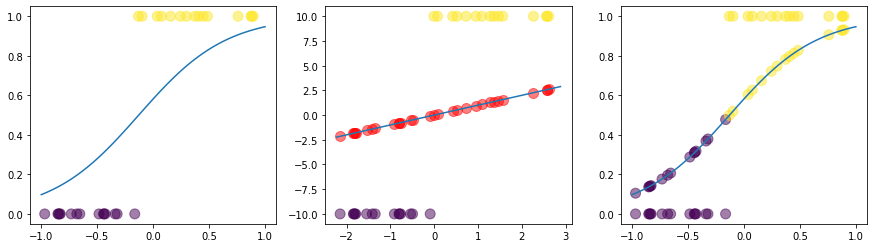

Lilelihood: 0.00013362050555646844
Log-lilelihood: -8.920506823935197



In [11]:
model = LogisticRegression(penalty='l2', max_iter=10_000)
model.fit(data_X.reshape(-1, 1), data_Y)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

beta_0 = model.intercept_[0]
beta_1 = model.coef_[0, 0]

print(f"beta_0: {beta_0}")
print(f"beta_1: {beta_1}")

x = np.linspace(-1, 1, 100)
y = beta_0 + beta_1 * x
p = 1 / (1 + np.exp(- y))


ax1.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
ax1.plot(x, p)


log_ods = np.log(data_Y/(1 - data_Y))
log_ods_vis = [-10 if x==-np.inf else 10 for x in log_ods]
X_log_ods = beta_0 + beta_1 * data_X

log_ods_p = np.log(p/(1-p))
x_log_ods_p = beta_0 + beta_1 * x

y_projectcion = beta_0 + beta_1 * data_X

ax2.plot(x_log_ods_p, log_ods_p)
ax2.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
ax2.scatter(X_log_ods, y_projectcion, s=100, alpha=0.5, c='red')

prob_y = 1 / (1 + np.exp(-y_projectcion))

ax3.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
ax3.scatter(data_X, prob_y, s=100, alpha=0.5, c=data_Y)
ax3.plot(x, p)

plt.show()


lilelihood = np.prod(
    np.where(prob_y > 0.5, prob_y, 1 - prob_y)
)

log_lilelihood = np.sum(
    np.log(
        np.where(prob_y > 0.5, prob_y, 1 - prob_y)
    )
)

print(f"Lilelihood: {lilelihood}")
print(f"Log-lilelihood: {log_lilelihood}")
print()